$$
m_{\hat{\Sigma}}(z)=-\int\frac{1}{\tau\ (z\gamma m_{\hat{\Sigma}}(z)+\gamma-1)+z}dF_{\Sigma}(\tau)
$$

In [16]:
import numpy as np
from scipy.optimize import newton

def solve_phi_newton(z, gamma, taus, weights, phi0=None):
    """
    Solve 1-gamma + z*phi + gamma*sum_i weights[i]/(phi*taus[i]+1) = 0
    for complex phi, using Newton's method.
    taus: array of eigenvalues (tau_i >= 0)
    weights: same shape, weights summing to 1 (dF_Sigma)
    z: complex
    gamma: scalar in (0,1)
    phi0: initial complex guess (default: 1j/z)
    """
    if phi0 is None:
        phi0 = 1j / z

    def H(phi):
        return (1 - gamma) + z * phi + gamma * np.sum(weights / (phi * taus + 1))

    def Hprime(phi):
        # derivative w.r.t. phi
        return z - gamma * np.sum(weights * taus / (phi * taus + 1)**2)

    return newton(H, phi0, fprime=Hprime, tol=1e-12, maxiter=500)

# example usage
taus   = np.array([0.5, 1.5, 3.0])     # sample eigenvalues
weights= np.array([0.2, 0.5, 0.3])     # their masses
gamma  = 0.8
z      = 3 + 1j*0.0001
phi_sol = solve_phi_newton(z, gamma, taus, weights)
print("φ(z) =", phi_sol)

φ(z) = (-0.3122224097673847+0.23637488836395845j)


In [17]:
from matplotlib import pyplot as plt

$$
m_\Sigma(z)=\frac{1}{z}(\frac{1}{\gamma}-1)+\frac{1}{\gamma}\hat{\varphi}(z)
$$

### Single true eigenvalues (MP-law)

In [46]:


print(f"Integral of density: {density_integral:.6f}")
print(f"Integral of dual density: {dual_density_integral:.6f}")
print(f"Integral of true density: {true_density_integral:.6f}")


Integral of density: 0.309636
Integral of dual density: 1.504780
Integral of true density: 1.000000


Integral of density: 1.001729
Integral of dual density: 0.004452
Integral of true density: 1.000000


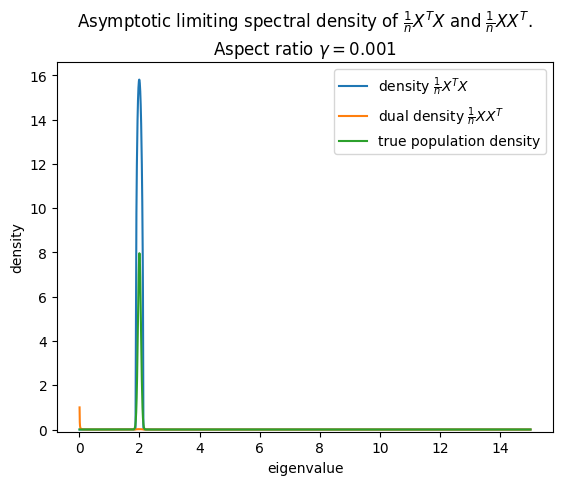

Integral of density: 1.000384
Integral of dual density: 0.013423
Integral of true density: 1.000000


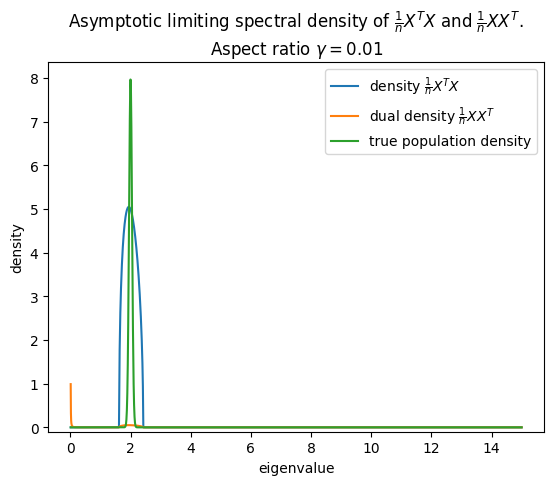

Integral of density: 0.999979
Integral of dual density: 0.103106
Integral of true density: 1.000000


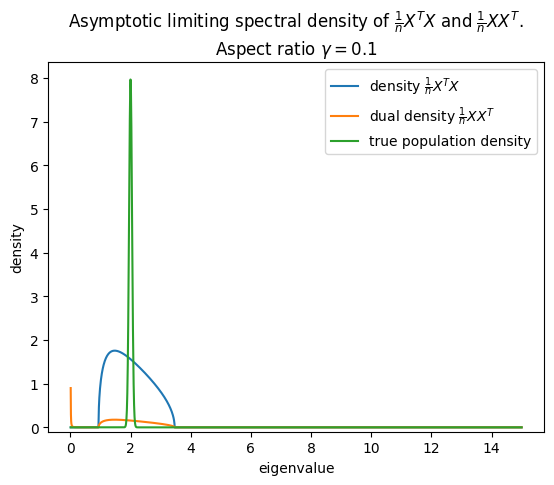

Integral of density: 0.999915
Integral of dual density: 0.202746
Integral of true density: 1.000000


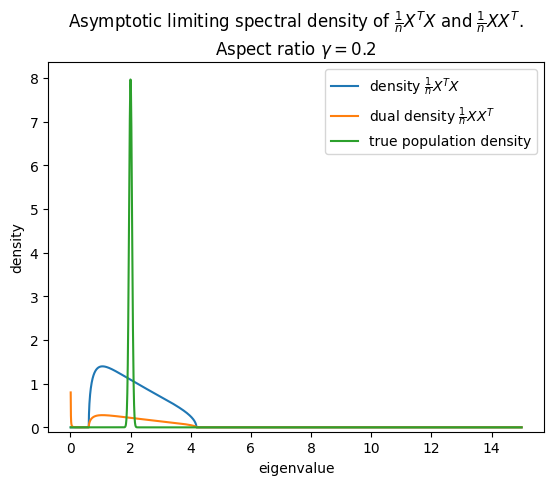

Integral of density: 1.000057
Integral of dual density: 0.501756
Integral of true density: 1.000000


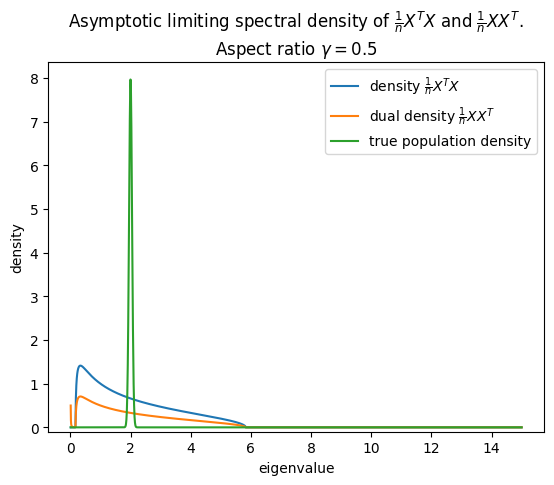

Integral of density: 0.999341
Integral of dual density: 0.849958
Integral of true density: 1.000000


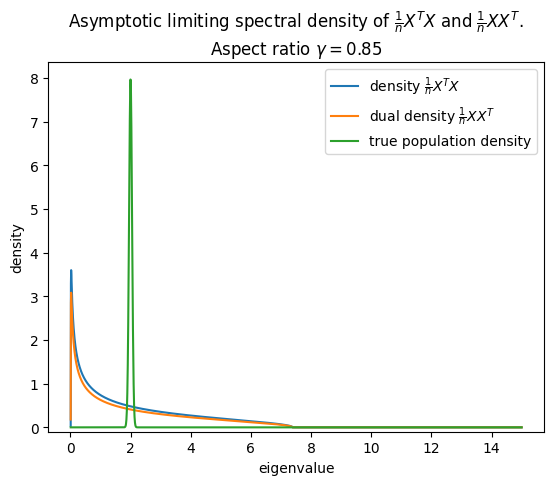

Integral of density: 0.955511
Integral of dual density: 0.955511
Integral of true density: 1.000000


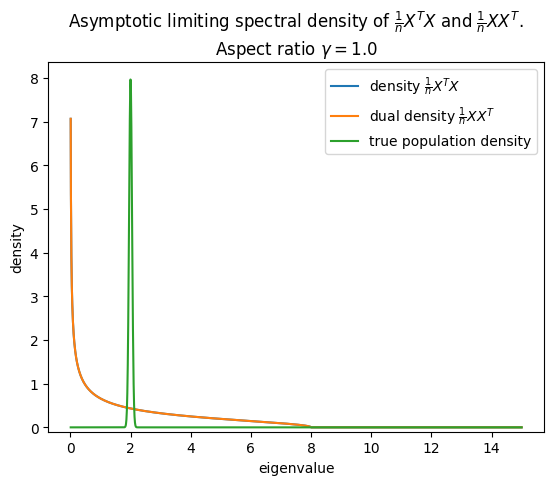

Integral of density: 0.800125
Integral of dual density: 0.999293
Integral of true density: 1.000000


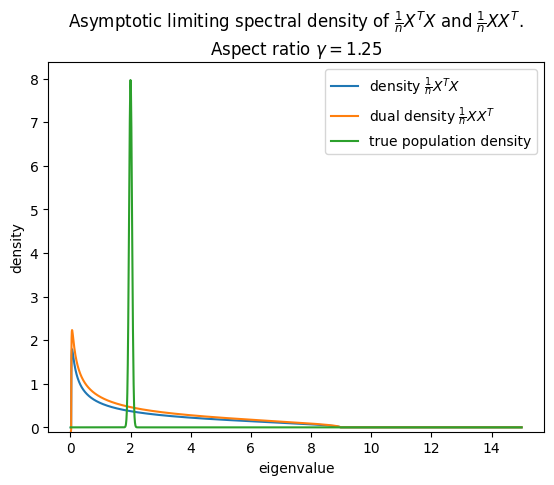

Integral of density: 0.666567
Integral of dual density: 0.998123
Integral of true density: 1.000000


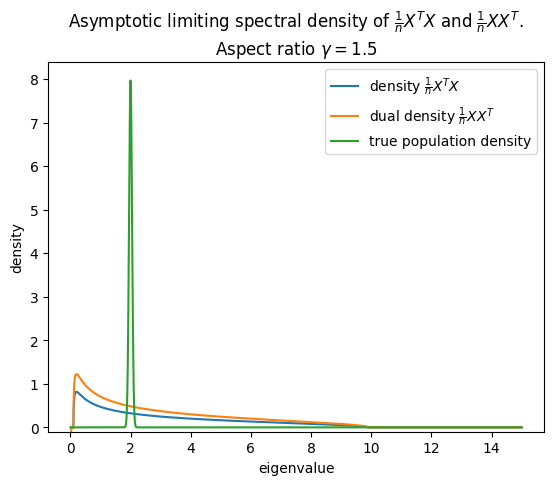

Integral of density: 0.500023
Integral of dual density: 0.996593
Integral of true density: 1.000000


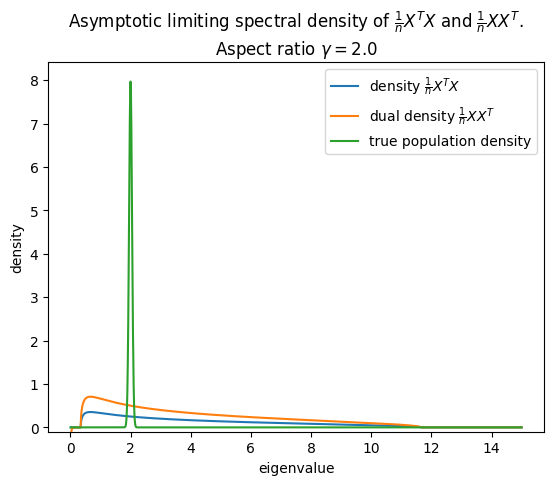

Integral of density: 0.166464
Integral of dual density: 0.818505
Integral of true density: 1.000000


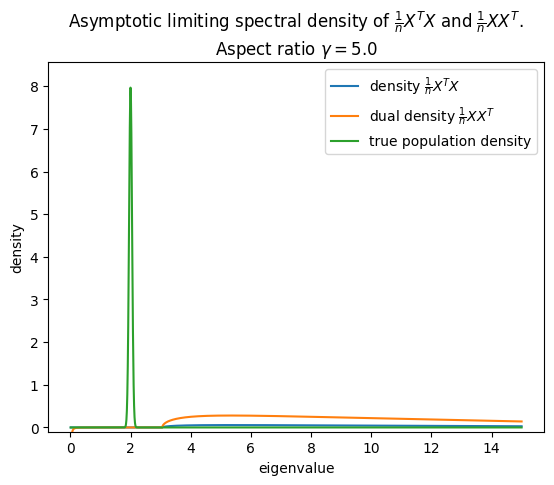

In [110]:

taus   = np.array([2.0])     # sample eigenvalues
weights= np.array([1.0])     # their masses
# z      = 3 + 1j*0.0001

true_density_bandwidth = 0.05
imag_eps = 0.0001
for gamma in [0.001, 0.01, 0.1, 0.2, 0.5, 0.85, 1.0, 1.25, 1.5, 2.0, 5.0]:
    density = []
    dual_density = []
    grid_x = np.linspace(1E-2, 15, 2000)
    for real_part in grid_x:
        z = real_part + 1j*imag_eps
        phi_sol = solve_phi_newton(z, gamma, taus, weights)
        m_sol = 1/z*(1/gamma-1) + 1/gamma*phi_sol
        density.append(m_sol.imag)
        dual_density.append(phi_sol.imag)

    density = np.array(density)
    dual_density = np.array(dual_density)# Integrate density against grid_x

    true_density = np.zeros_like(grid_x)
    for tau, weight in zip(taus, weights):
        true_density += weight * np.exp(-(grid_x - tau)**2 / (2*true_density_bandwidth**2)) / (true_density_bandwidth * np.sqrt(2*np.pi))
    
    density_integral = np.trapz(density, grid_x) / np.pi
    dual_density_integral = np.trapz(dual_density, grid_x) / np.pi
    true_density_integral = np.trapz(true_density, grid_x)
    print(f"Integral of density: {density_integral:.6f}")
    print(f"Integral of dual density: {dual_density_integral:.6f}")
    print(f"Integral of true density: {true_density_integral:.6f}")
    
    plt.plot(grid_x, density, label='density $\\frac{1}{n} X^TX$')
    plt.plot(grid_x, dual_density, label='dual density $\\frac{1}{n} XX^T$')
    # somehow plot the true density, convolve small gaussian kernel
    plt.plot(grid_x, true_density, label='true population density')
    plt.ylim(-0.1, None)
    plt.xlabel('eigenvalue')
    plt.ylabel('density')
    plt.title('Asymptotic limiting spectral density of $\\frac{1}{n} X^TX$ and $\\frac{1}{n} XX^T$.\n'+f'Aspect ratio $\\gamma = {gamma}$')
    plt.legend()
    plt.show()

### Three bands on true eigenvalues

419.06570367288725
43.65880777755623


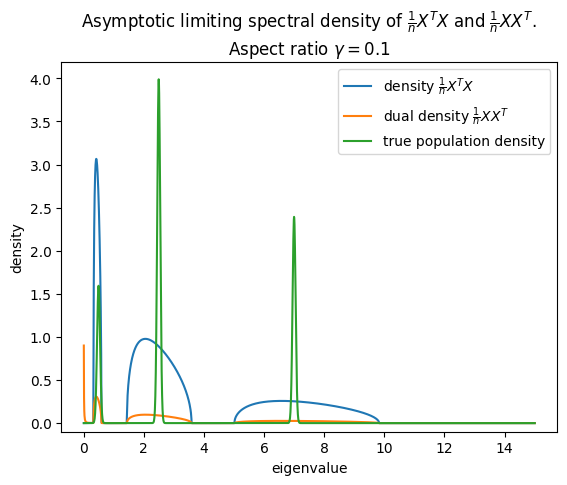

419.03793447849887
85.36513126038199


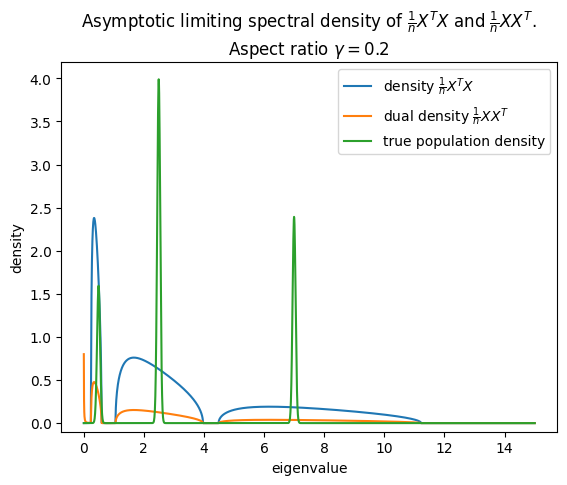

418.786701875988
210.3668161659204


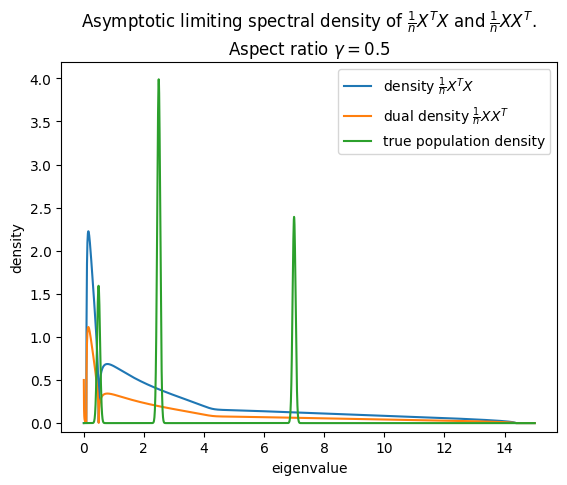

413.00978884709696
351.35036008841035


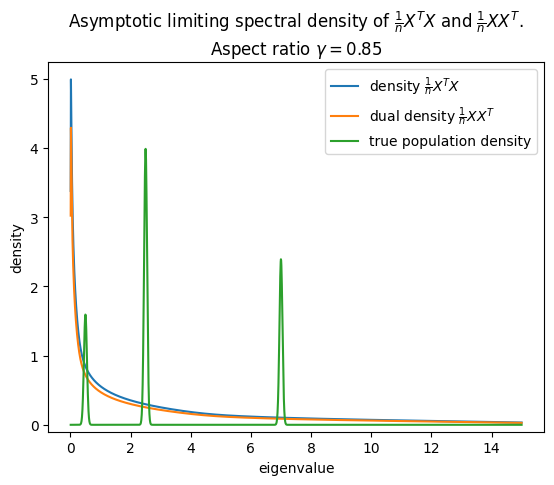

391.46463301851526
391.46463301851526


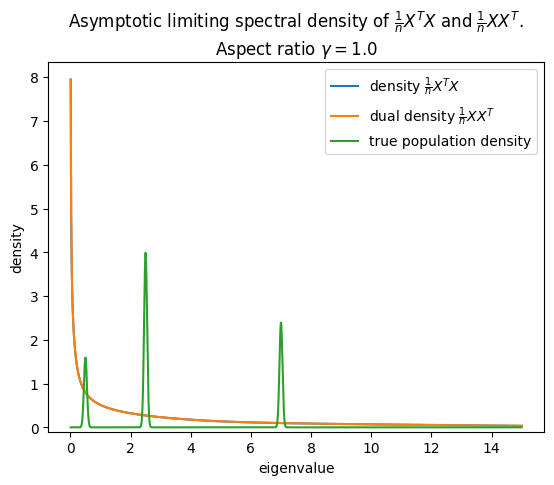

319.4728507865368
398.85433086920784


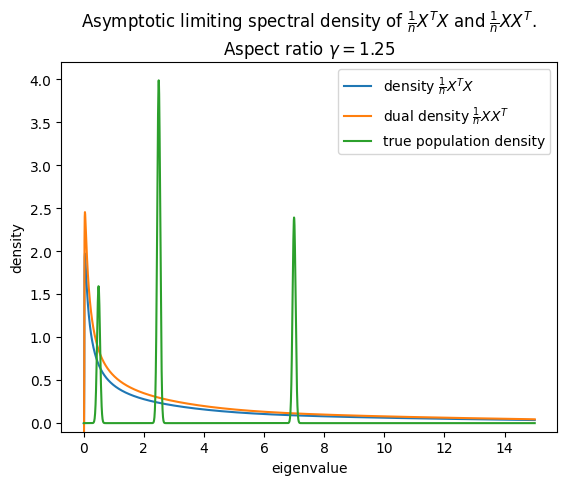

259.2455467914681
387.8948549592758


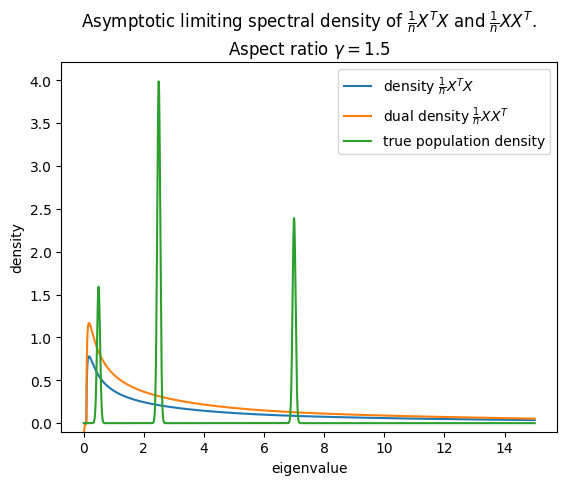

182.75027588564595
363.5536213154391


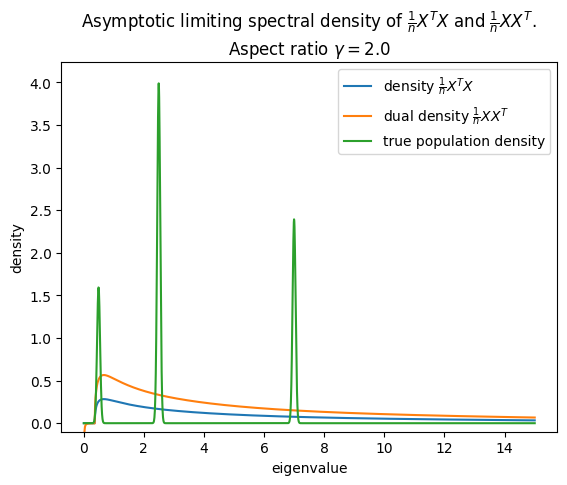

41.30321177115885
198.72833703238314


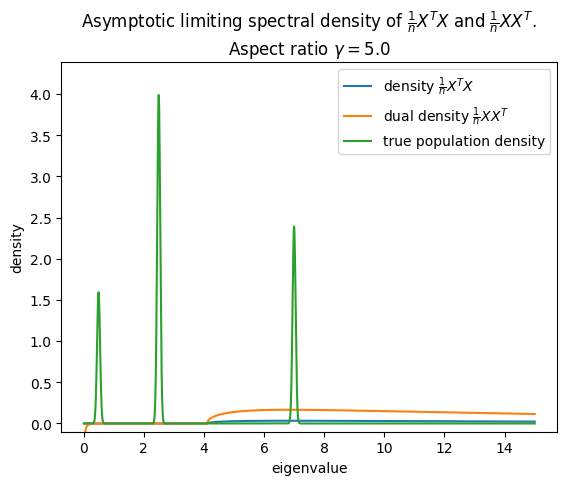

In [ ]:

taus   = np.array([0.5, 2.5, 7.0])     # sample eigenvalues
weights= np.array([0.2, 0.5, 0.3])     # their masses
# z      = 3 + 1j*0.0001

true_density_bandwidth = 0.05
imag_eps = 0.0001
for gamma in [0.1, 0.2, 0.5, 0.85, 1.0, 1.25, 1.5, 2.0, 5.0]:
    density = []
    dual_density = []
    grid_x = np.linspace(1E-2, 15, 2000)
    for real_part in grid_x:
        z = real_part + 1j*imag_eps
        phi_sol = solve_phi_newton(z, gamma, taus, weights)
        m_sol = 1/z*(1/gamma-1) + 1/gamma*phi_sol 
        density.append(m_sol.imag)
        dual_density.append(phi_sol.imag)

    density = np.array(density)
    dual_density = np.array(dual_density)
    print(density.sum())
    print(dual_density.sum())

    plt.plot(grid_x, density, label='density $\\frac{1}{n} X^TX$')
    plt.plot(grid_x, dual_density, label='dual density $\\frac{1}{n} XX^T$')
    # somehow plot the true density, convolve small gaussian kernel
    true_density = np.zeros_like(grid_x)
    for tau, weight in zip(taus, weights):
        true_density += weight * np.exp(-(grid_x - tau)**2 / (2*true_density_bandwidth**2)) / (true_density_bandwidth * np.sqrt(2*np.pi))
    plt.plot(grid_x, true_density, label='true population density')
    plt.ylim(-0.1, None)
    plt.xlabel('eigenvalue')
    plt.ylabel('density')
    plt.title('Asymptotic limiting spectral density of $\\frac{1}{n} X^TX$ and $\\frac{1}{n} XX^T$.\n'+f'Aspect ratio $\\gamma = {gamma}$')
    plt.legend()
    plt.show()

29524.05903464644
6991.978311550256


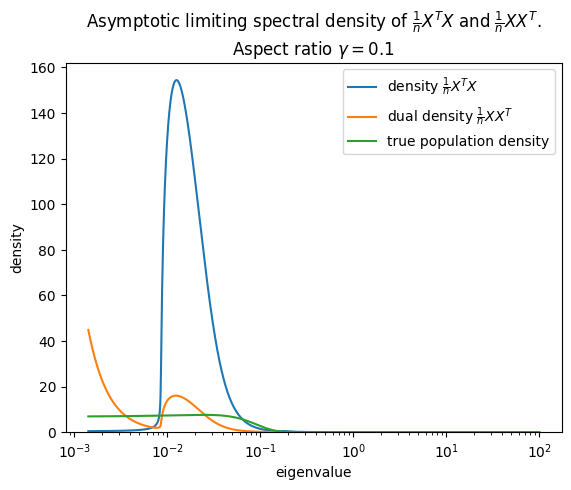

33202.04046008153
10231.13912142574


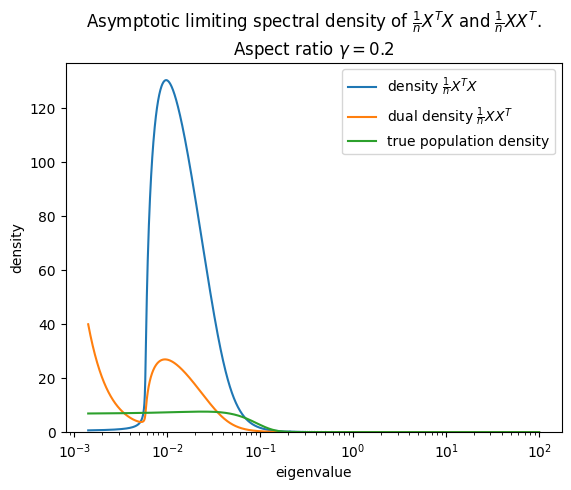

52466.83357467931
28477.62368072055


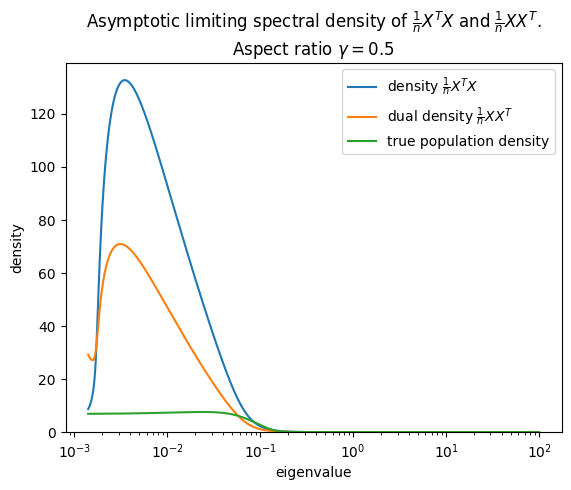

56210.41732634941
48452.11679541127


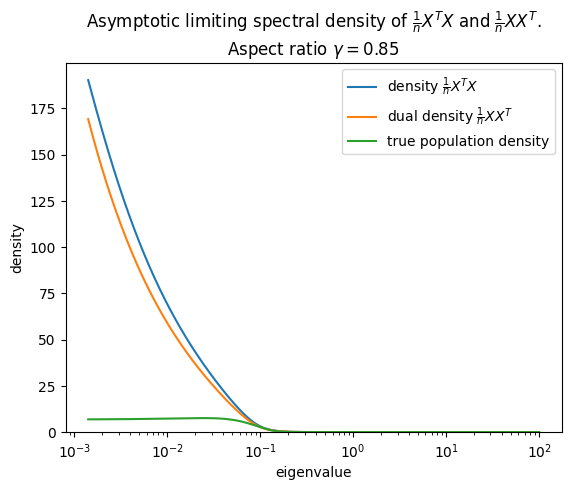

51403.403287330795
51403.403287330795


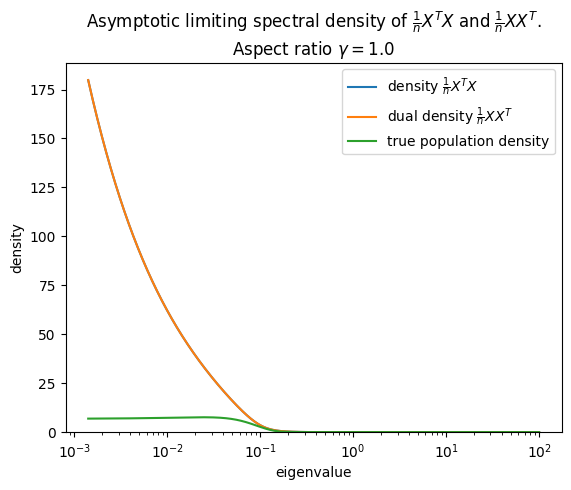

42470.853837954244
51966.46385075236


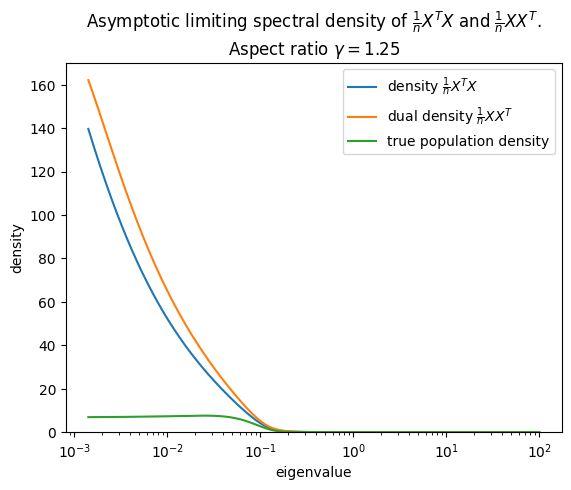

32465.550690211334
46454.119141936106


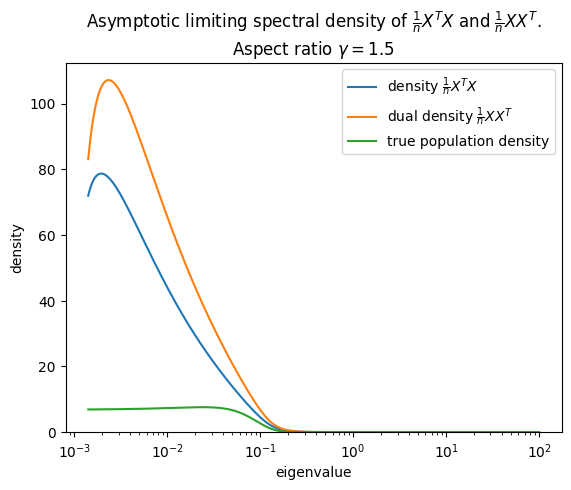

12257.130148897688
20025.846511033586


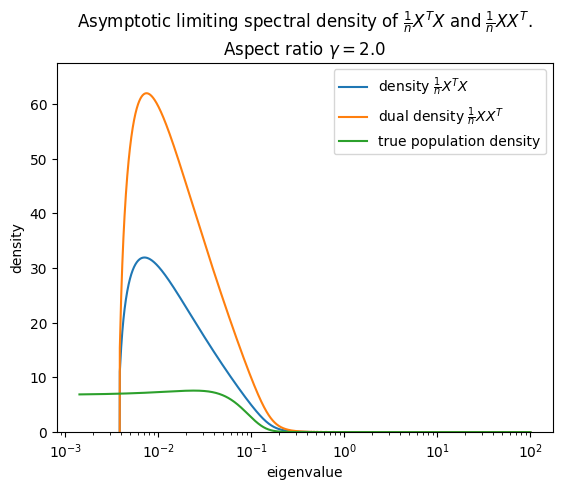

1140.9215046747238
-12249.047623673545


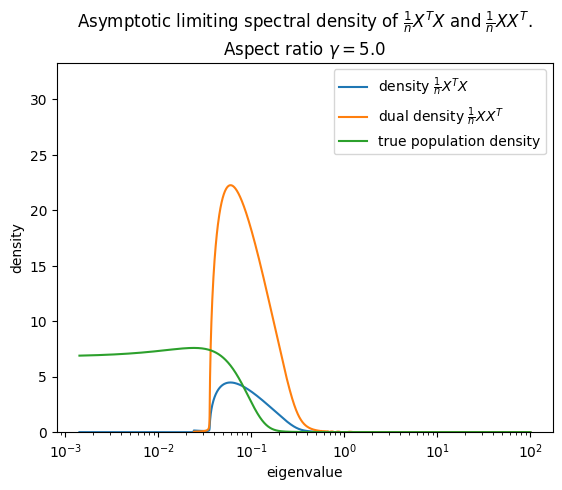

In [83]:

# taus   = np.array([0.5, 2.5, 7.0])     # sample eigenvalues
# weights= np.array([0.2, 0.5, 0.3])     # their masses
k_index = np.arange(1, 5000).astype(float)
A = 1
alpha = 0.5
taus    = A * k_index**(-alpha)
weights = np.ones_like(taus) / len(taus)
# taus   = np.array([0.5, 2.5, 7.0])     # sample eigenvalues
# weights= np.array([0.2, 0.5, 0.3])     # their masses
# z      = 3 + 1j*0.0001
# grid_x = np.linspace(1E-2, 15, 2000)
grid_x = np.logspace(np.log10(min(taus))-1, np.log10(max(taus))+2, 2000)
true_density = np.zeros_like(grid_x)
for tau, weight in zip(taus, weights):
    true_density += weight * np.exp(-(grid_x - tau)**2 / (2*true_density_bandwidth**2)) / (true_density_bandwidth * np.sqrt(2*np.pi))


true_density_bandwidth = 0.05
imag_eps = 0.0001
for gamma in [0.1, 0.2, 0.5, 0.85, 1.0, 1.25, 1.5, 2.0, 5.0]:
    density = []
    dual_density = []
    grid_x = np.logspace(np.log10(min(taus))-1, np.log10(max(taus))+2, 2000)
    for real_part in grid_x:
        z = real_part + 1j*imag_eps
        phi_sol = solve_phi_newton(z, gamma, taus, weights)
        m_sol = 1/z*(1/gamma-1) + 1/gamma*phi_sol
        density.append(m_sol.imag)
        dual_density.append(phi_sol.imag)

    density = np.array(density)
    dual_density = np.array(dual_density)
    print(density.sum())
    print(dual_density.sum())

    plt.plot(grid_x, density, label='density $\\frac{1}{n} X^TX$')
    plt.plot(grid_x, dual_density, label='dual density $\\frac{1}{n} XX^T$')
    # somehow plot the true density, convolve small gaussian kernel
    plt.plot(grid_x, true_density, label='true population density')
    plt.xscale('log')
    # plt.yscale('log')
    plt.ylim(1E-10, None)
    plt.xlabel('eigenvalue')
    plt.ylabel('density')
    plt.title('Asymptotic limiting spectral density of $\\frac{1}{n} X^TX$ and $\\frac{1}{n} XX^T$.\n'+f'Aspect ratio $\\gamma = {gamma}$')
    plt.legend()
    plt.show()

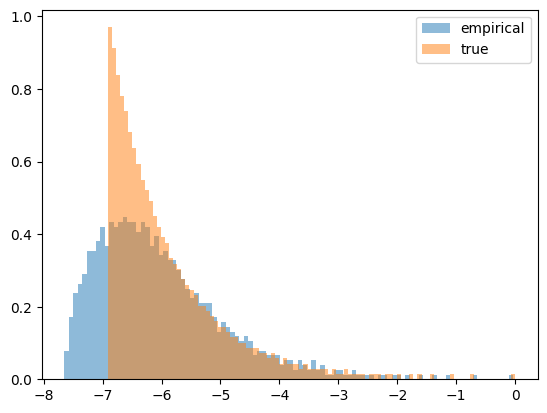

In [98]:
n_sample = 5000
d_feature = 1000

k_index = np.arange(1, d_feature+1).astype(float)
A = 1
alpha = 1
eigenvalues = A * k_index**(-alpha)

X = np.random.randn(n_sample, d_feature)
X = X * np.sqrt(eigenvalues[None, :])
cov_matrix = X.T @ X / n_sample
empirical_eigenvalues = np.linalg.eigvals(cov_matrix)
plt.hist(np.log(empirical_eigenvalues), bins=100, density=True, alpha=0.5, label='empirical')
plt.hist(np.log(eigenvalues), bins=100, density=True, alpha=0.5, label='true')
plt.legend()
plt.show()

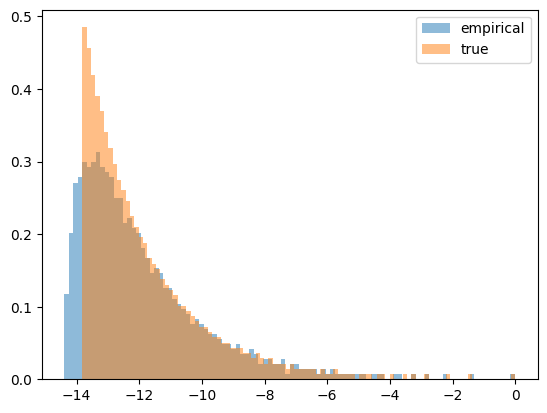

In [99]:
n_sample = 5000
d_feature = 1000

k_index = np.arange(1, d_feature+1).astype(float)
A = 1
alpha = 2
eigenvalues = A * k_index**(-alpha)

X = np.random.randn(n_sample, d_feature)
X = X * np.sqrt(eigenvalues[None, :])
cov_matrix = X.T @ X / n_sample
empirical_eigenvalues = np.linalg.eigvals(cov_matrix)
plt.hist(np.log(empirical_eigenvalues), bins=100, density=True, alpha=0.5, label='empirical')
plt.hist(np.log(eigenvalues), bins=100, density=True, alpha=0.5, label='true')
plt.legend()
plt.show()

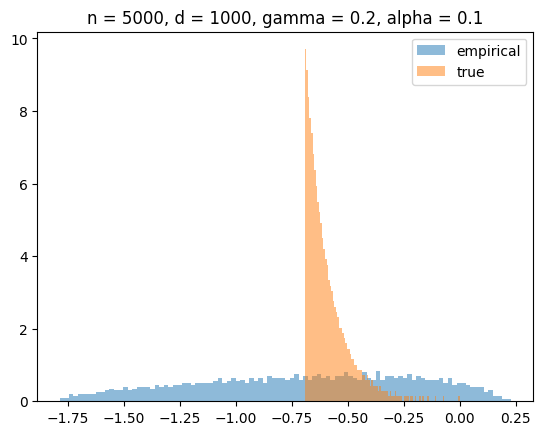

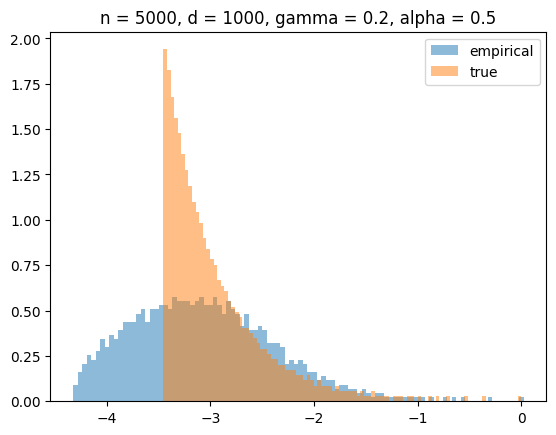

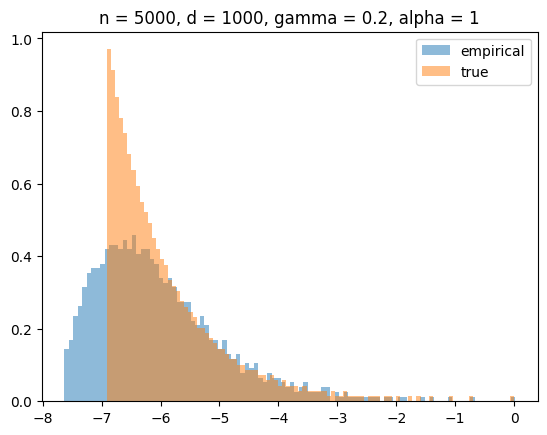

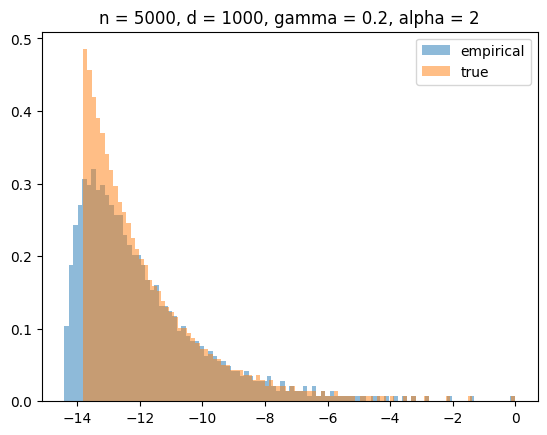

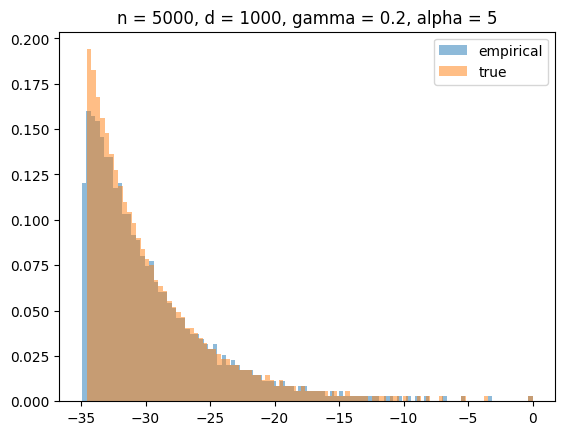

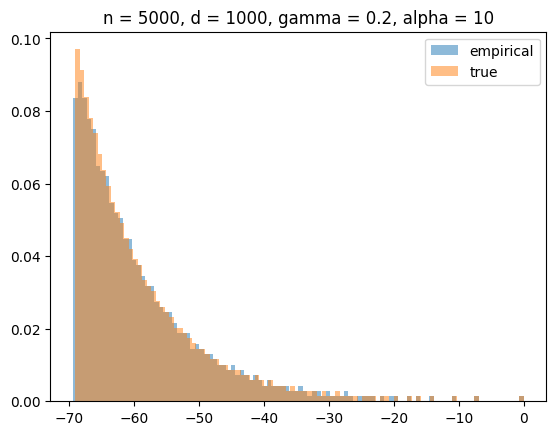

In [103]:
n_sample = 5000
d_feature = 1000

k_index = np.arange(1, d_feature+1).astype(float)
A = 1
for alpha in [0.1, 0.5, 1, 2, 5, 10]:
    eigenvalues = A * k_index**(-alpha)
    X = np.random.randn(n_sample, d_feature)
    X = X * np.sqrt(eigenvalues[None, :])
    cov_matrix = X.T @ X / n_sample
    empirical_eigenvalues = np.linalg.eigvals(cov_matrix)
    plt.hist(np.log(empirical_eigenvalues), bins=100, density=True, alpha=0.5, label='empirical')
    plt.hist(np.log(eigenvalues), bins=100, density=True, alpha=0.5, label='true')
    plt.legend()
    plt.title(f'n = {n_sample}, d = {d_feature}, gamma = {d_feature/n_sample}, alpha = {alpha}')
    plt.show()

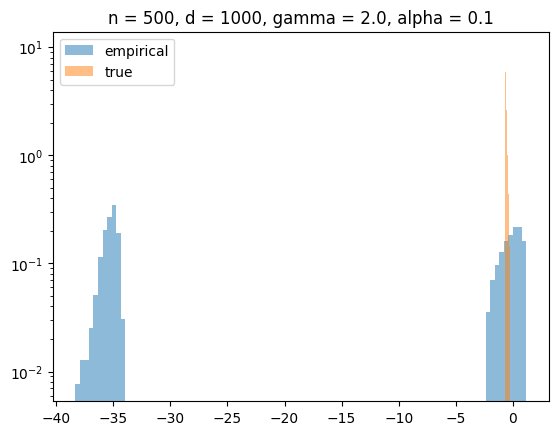

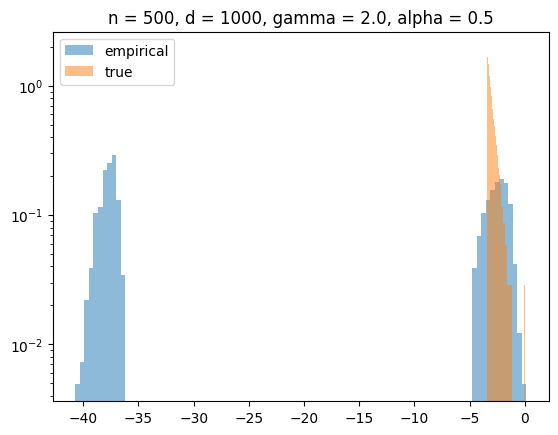

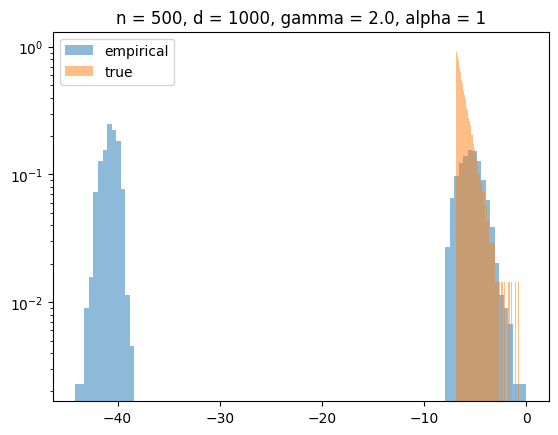

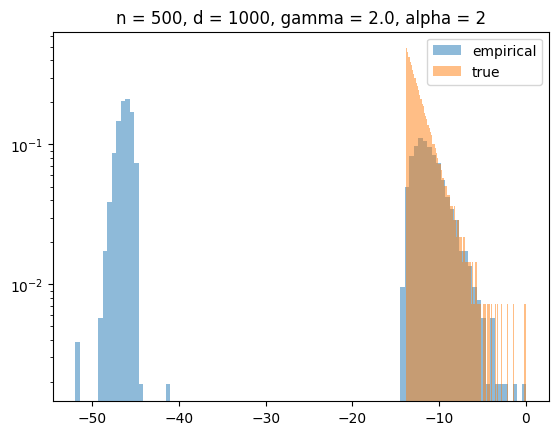

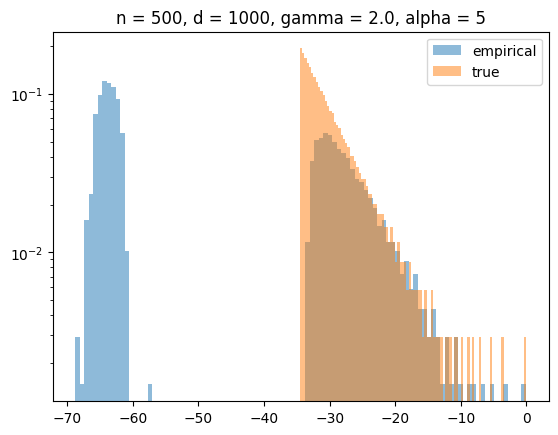

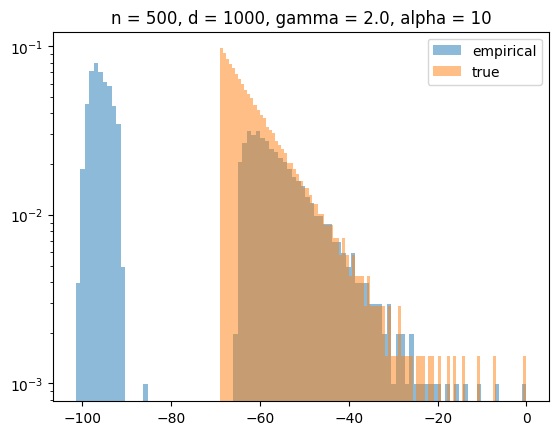

In [107]:
n_sample = 500
d_feature = 1000

k_index = np.arange(1, d_feature+1).astype(float)
A = 1
for alpha in [0.1, 0.5, 1, 2, 5, 10]:
    eigenvalues = A * k_index**(-alpha)
    X = np.random.randn(n_sample, d_feature)
    X = X * np.sqrt(eigenvalues[None, :])
    cov_matrix = X.T @ X / n_sample
    empirical_eigenvalues = np.linalg.eigvals(cov_matrix)
    plt.hist(np.log(empirical_eigenvalues), bins=100, density=True, alpha=0.5, label='empirical')
    plt.hist(np.log(eigenvalues), bins=100, density=True, alpha=0.5, label='true')
    plt.legend()
    plt.yscale('log')
    plt.title(f'n = {n_sample}, d = {d_feature}, gamma = {d_feature/n_sample}, alpha = {alpha}')
    plt.show()

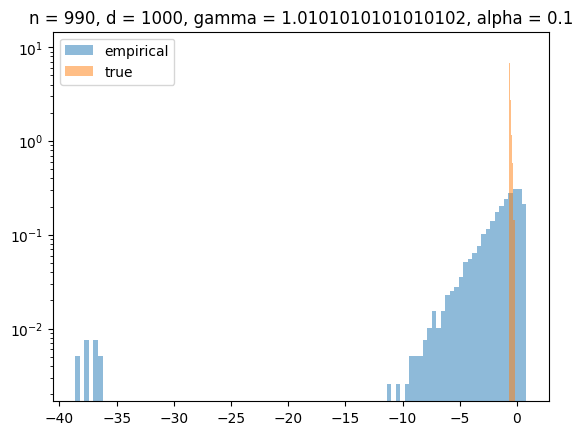

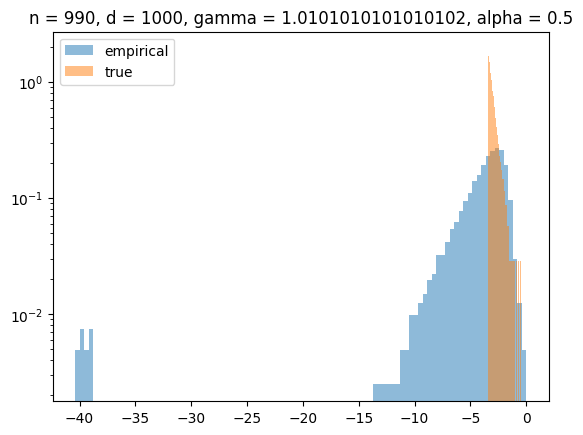

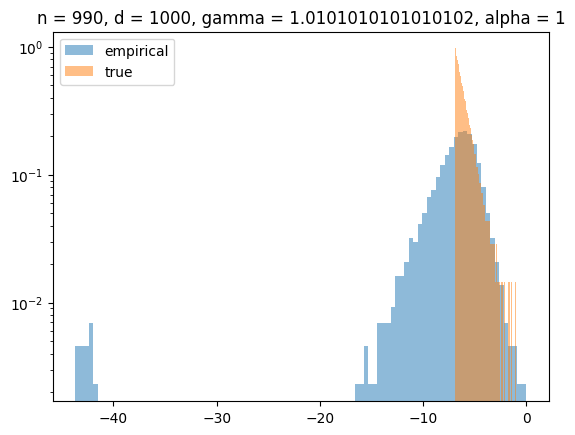

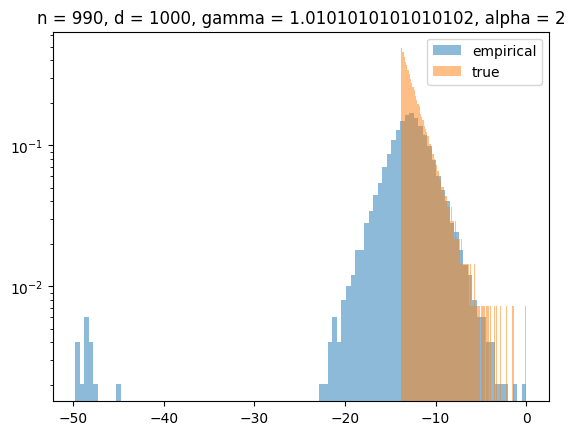

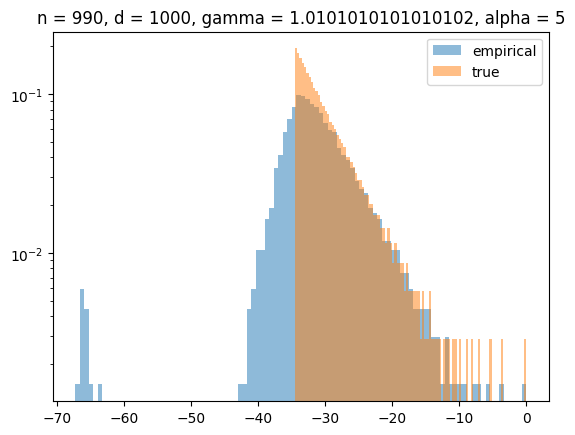

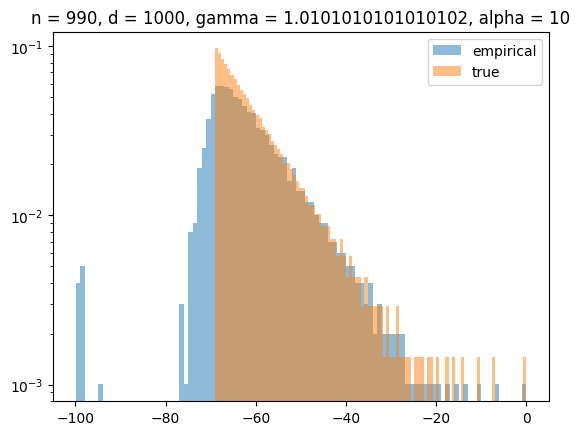

In [108]:
n_sample = 990
d_feature = 1000

k_index = np.arange(1, d_feature+1).astype(float)
A = 1
for alpha in [0.1, 0.5, 1, 2, 5, 10]:
    eigenvalues = A * k_index**(-alpha)
    X = np.random.randn(n_sample, d_feature)
    X = X * np.sqrt(eigenvalues[None, :])
    cov_matrix = X.T @ X / n_sample
    empirical_eigenvalues = np.linalg.eigvals(cov_matrix)
    plt.hist(np.log(empirical_eigenvalues), bins=100, density=True, alpha=0.5, label='empirical')
    plt.hist(np.log(eigenvalues), bins=100, density=True, alpha=0.5, label='true')
    plt.legend()
    plt.yscale('log')
    plt.title(f'n = {n_sample}, d = {d_feature}, gamma = {d_feature/n_sample}, alpha = {alpha}')
    plt.show()

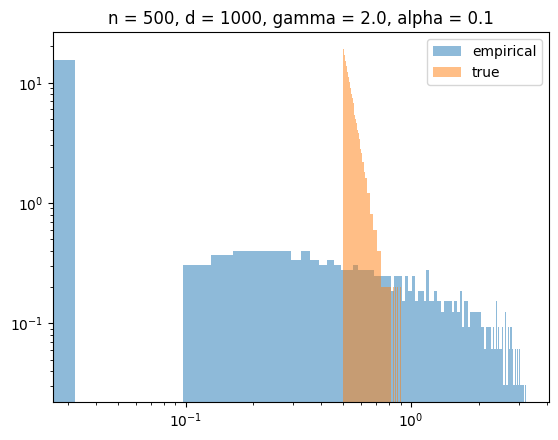

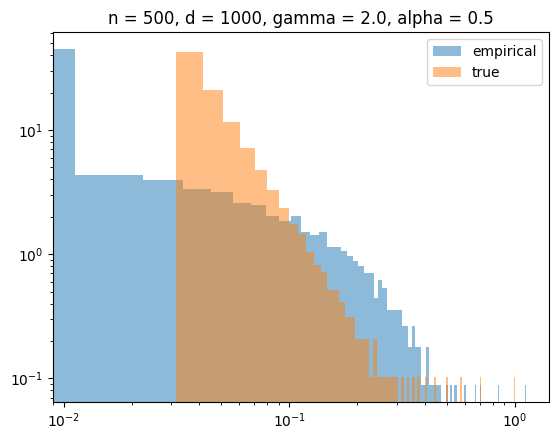

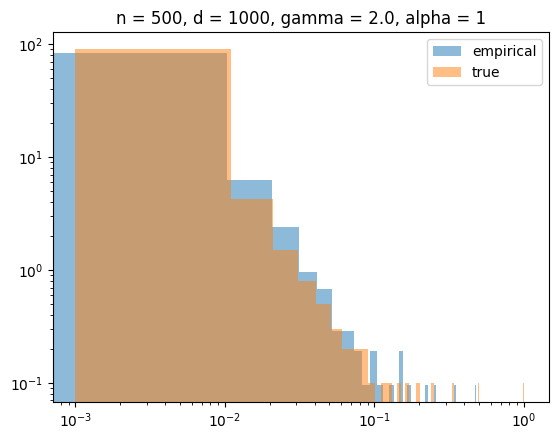

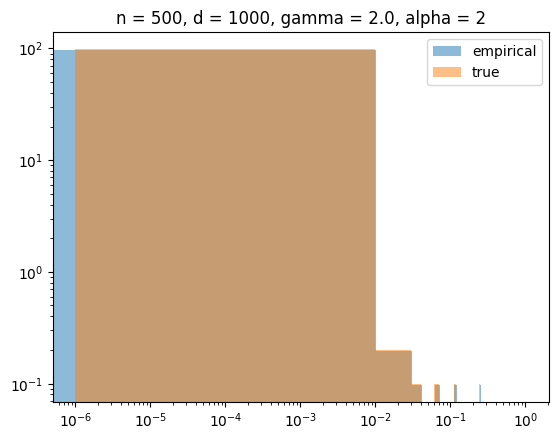

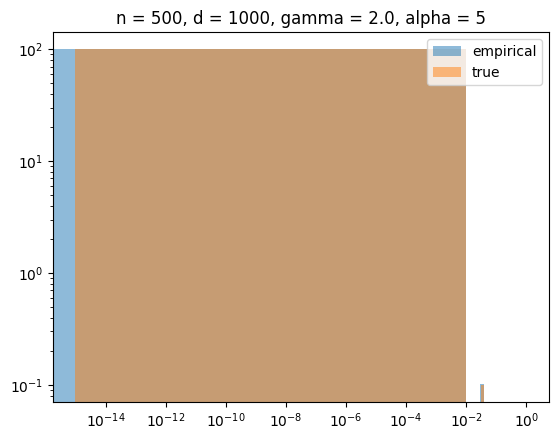

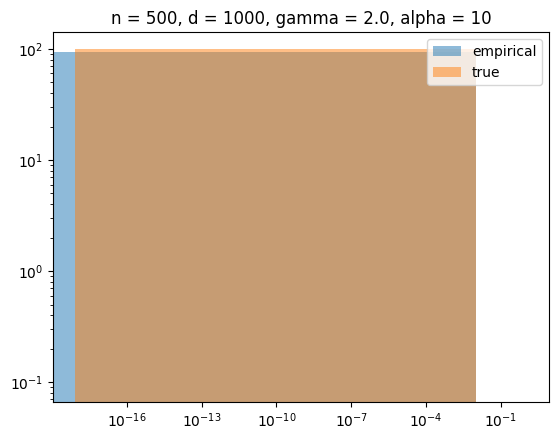

In [ ]:
n_sample = 500
d_feature = 1000

k_index = np.arange(1, d_feature+1).astype(float)
A = 1
for alpha in [0.1, 0.5, 1, 2, 5, 10]:
    eigenvalues = A * k_index**(-alpha)
    X = np.random.randn(n_sample, d_feature)
    X = X * np.sqrt(eigenvalues[None, :])
    cov_matrix = X.T @ X / n_sample
    empirical_eigenvalues = np.linalg.eigvals(cov_matrix)
    plt.hist((empirical_eigenvalues), bins=100, density=True, alpha=0.5, label='empirical')
    plt.hist((eigenvalues), bins=100, density=True, alpha=0.5, label='true')
    plt.legend()
    plt.yscale('log')
    plt.title(f'n = {n_sample}, d = {d_feature}, gamma = {d_feature/n_sample}, alpha = {alpha}')
    plt.show()

In [52]:
lambda_k

array([1.00000000e+00, 2.50000000e-01, 1.11111111e-01, ...,
       1.00060027e-08, 1.00040012e-08, 1.00020003e-08])

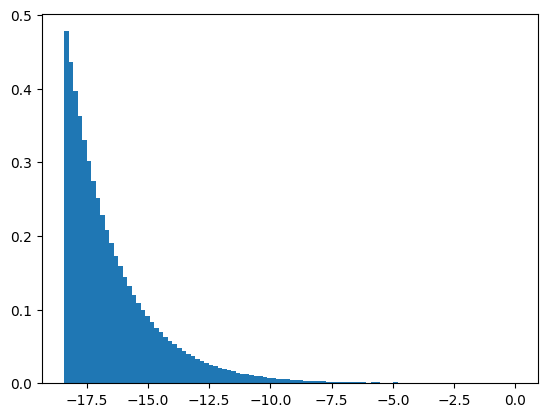

In [70]:
A = 1
alpha = 2
k_index = np.arange(1, 10000).astype(float)
lambda_k = A * k_index**(-alpha)
plt.hist(np.log(lambda_k), bins=100, density=True)
plt.show()

In [73]:
normalization

630.4620671195647

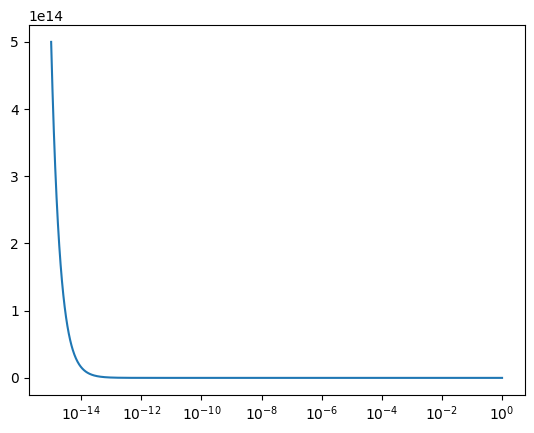

In [74]:
# grid_x = np.linspace(1E-2, 15, 2000)
grid_x = np.logspace(np.log10(1E-15), np.log10(1), 2000)
ideal_density = (grid_x / A)**(-1/alpha-1)
normalization = np.trapz(ideal_density, grid_x)
ideal_density = ideal_density / normalization
plt.plot(grid_x, ideal_density)
plt.xscale('log')
plt.show()